# Récupération des données

Deux types de classement ATP et WPA

ATP -> 1968 à 2024

Distinction simple/double homme/Femme

WPA -> 1968 à 2024


Etude python pur + pandas

Question : Distribution joeurs par pays

Sur l'ensemble des données (de 1968 à 2024) quelle est la répartition des nationalités chez les hommes et chez les femmes.

## I. Python brut

Récupération des informations chez les hommes

In [1]:
import os

joueurs_hommes = []
chemin = os.path.join("donnees_tennis","ATP","atp_players.csv")
with open(chemin, 'r') as fd:
    for ligne in fd:
        s = ligne.strip('\n')
        l = s.split(',')
        joueurs_hommes.append(l)


Création d'un dictionnaire avec les origines et les effectifs

In [6]:
repartition_loc = dict()
repartition_loc['USA'] = [1,0]
for joueur in joueurs_hommes[1:]:
    if joueur[5] in repartition_loc.keys():
        repartition_loc[joueur[5]][0] += 1
    else:
        repartition_loc[joueur[5]] = [1,0]

print(repartition_loc)

{'USA': [13229, 0], 'ECU': [452, 0], 'AUS': [3285, 0], 'ITA': [2726, 0], 'RSA': [1053, 0], 'DEN': [245, 0], 'HUN': [382, 0], 'CHI': [691, 0], 'POL': [695, 0], 'PER': [270, 0], 'IND': [1095, 0], 'SWE': [889, 0], 'ESP': [3081, 0], 'SUI': [685, 0], 'GER': [2742, 0], 'ROU': [760, 0], 'CRO': [554, 0], 'JPN': [1329, 0], 'CZE': [756, 0], 'RUS': [1118, 0], 'GBR': [3281, 0], 'BRA': [2104, 0], 'FRA': [2648, 0], 'ZIM': [108, 0], 'SRB': [410, 0], 'NED': [810, 0], 'CAN': [1005, 0], 'GRE': [341, 0], 'MEX': [1342, 0], 'JAM': [123, 0], 'COL': [670, 0], 'ARG': [1760, 0], 'BEL': [558, 0], 'NZL': [368, 0], 'VEN': [439, 0], 'EGY': [329, 0], 'BOL': [225, 0], 'AUT': [789, 0], 'PAK': [160, 0], 'YUG': [210, 0], 'NGR': [233, 0], 'PUR': [82, 0], 'PAR': [109, 0], 'IRL': [347, 0], 'IRI': [266, 0], 'FIN': [333, 0], 'URU': [119, 0], 'ISR': [556, 0], 'KOR': [596, 0], 'CRC': [54, 0], 'MAR': [364, 0], 'HAI': [39, 0], 'LAT': [83, 0], 'INA': [278, 0], 'SEN': [35, 0], 'LUX': [84, 0], 'BAH': [34, 0], 'SVK': [397, 0], 'UKR

Récupération des informations chez les femmes

In [7]:
joueurs_femmes = []
chemin = os.path.join("donnees_tennis","WTA","wta_players.csv")
with open(chemin, 'r') as fd:
    for ligne in fd:
        s = ligne.strip('\n')
        l = s.split(',')
        joueurs_femmes.append(l)

Ajout des effectifs des femmes aux dictionnaires

In [8]:
for joueur in joueurs_femmes[1:]:
    if joueur[5] in repartition_loc.keys():
        repartition_loc[joueur[5]][1] += 1
    else:
        repartition_loc[joueur[5]] = [0,1]

print(repartition_loc)

{'USA': [13229, 19226], 'ECU': [452, 129], 'AUS': [3285, 3063], 'ITA': [2726, 1818], 'RSA': [1053, 1119], 'DEN': [245, 187], 'HUN': [382, 378], 'CHI': [691, 173], 'POL': [695, 492], 'PER': [270, 141], 'IND': [1095, 965], 'SWE': [889, 586], 'ESP': [3081, 1483], 'SUI': [685, 661], 'GER': [2742, 2069], 'ROU': [760, 739], 'CRO': [554, 334], 'JPN': [1329, 1344], 'CZE': [756, 728], 'RUS': [1118, 1284], 'GBR': [3281, 12631], 'BRA': [2104, 768], 'FRA': [2648, 2239], 'ZIM': [108, 30], 'SRB': [410, 356], 'NED': [810, 657], 'CAN': [1005, 1254], 'GRE': [341, 241], 'MEX': [1342, 712], 'JAM': [123, 105], 'COL': [670, 394], 'ARG': [1760, 831], 'BEL': [558, 466], 'NZL': [368, 715], 'VEN': [439, 231], 'EGY': [329, 291], 'BOL': [225, 129], 'AUT': [789, 507], 'PAK': [160, 29], 'YUG': [210, 102], 'NGR': [233, 139], 'PUR': [82, 77], 'PAR': [109, 76], 'IRL': [347, 666], 'IRI': [266, 36], 'FIN': [333, 173], 'URU': [119, 79], 'ISR': [556, 391], 'KOR': [596, 461], 'CRC': [54, 29], 'MAR': [364, 161], 'HAI': [39

Transformation en tableau à double entrée : effectif par nationnalité et sexe

In [9]:
tableau = [['Nationalité', 'Hommes', 'Femmes', 'Total']] # En-têtes

for nationalite, effectifs in repartition_loc.items():
    hommes, femmes = effectifs[0], effectifs[1]
    total = hommes + femmes
    tableau.append([nationalite, hommes, femmes, total])

Création de l'histogramme

In [10]:
# Importation des bibliothèques
import matplotlib.pyplot as plt
import numpy as np

In [11]:
tableau_filtre = [tableau[0]]  # Garder les en-têtes

lignes_filtrees = []  # Stocker les lignes filtrées

for ligne in tableau[1:]:
    if ligne[3] > 1500:
        lignes_filtrees.append(ligne)

# Trier les lignes filtrées
lignes_filtrees_tri = sorted(lignes_filtrees, key=lambda ligne: ligne[3], reverse=True)

# Ajouter les lignes triées au tableau filtré
tableau_filtre.extend(lignes_filtrees_tri)

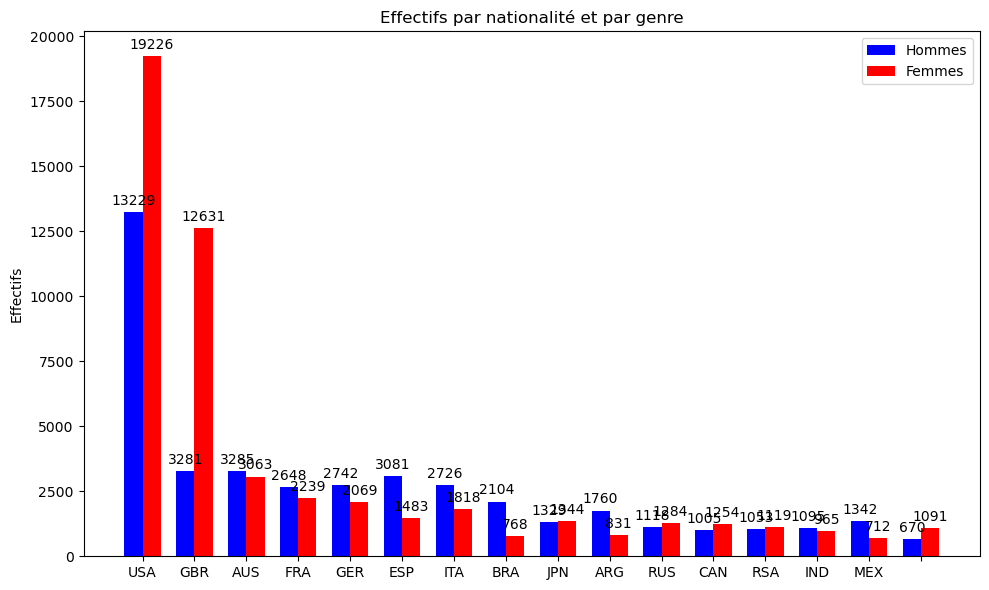

In [12]:
# Construction d'une liste nationnalité, hommes et femmes
nationalites = [ligne[0] for ligne in tableau_filtre[1:]]
hommes = [ligne[1] for ligne in tableau_filtre[1:]]
femmes = [ligne[2] for ligne in tableau_filtre[1:]]

x = np.arange(len(nationalites))  # Emplacements des étiquettes
largeur = 0.35  # Largeur des barres

# Modifier la taille de la figure
fig, ax = plt.subplots(figsize=(10, 6))  # Largeur = 10 pouces, Hauteur = 6 pouces
rects1 = ax.bar(x - largeur/2, hommes, largeur, label='Hommes', color='blue')
rects2 = ax.bar(x + largeur/2, femmes, largeur, label='Femmes', color='red')

# Ajout des étiquettes et du titre
ax.set_ylabel('Effectifs')
ax.set_title('Effectifs par nationalité et par genre')
ax.set_xticks(x)
ax.set_xticklabels(nationalites)
ax.legend()

# Ajout des valeurs au-dessus des barres
def autolabel(rects):
    for rect in rects:
        hauteur = rect.get_height()
        ax.annotate('{}'.format(hauteur),
                    xy=(rect.get_x() + rect.get_width() / 2, hauteur),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Pandas

In [13]:
%reset -f

In [1]:
# Librairie
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Récuperation des données

In [17]:
chemin = os.path.join("donnees_tennis","ATP","atp_players.csv")
joueurs_hommes = pd.read_csv(chemin)

chemin = os.path.join("donnees_tennis","WTA","wta_players.csv")
joueurs_femmes = pd.read_csv(chemin)


C:\Users\33663\AppData\Local\Temp\ipykernel_102168\200212725.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  joueurs_hommes = pd.read_csv(chemin)
C:\Users\33663\AppData\Local\Temp\ipykernel_102168\200212725.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  joueurs_femmes = pd.read_csv(chemin)


Warnings sur la colonne 8 -> identifiant wikipédia

Pas d'importance ici on ne travaille qu'avec les nationnalité colonne 6

Création d'un nouveau dataframe ne contenant

In [18]:
# Effectifs hommes par nationalité
effectifs_hommes = joueurs_hommes['ioc'].value_counts().reset_index()
effectifs_hommes.columns = ['nationalite', 'effectifs_hommes']

# Effectifs femmes par nationalité
effectifs_femmes = joueurs_femmes['ioc'].value_counts().reset_index()
effectifs_femmes.columns = ['nationalite', 'effectifs_femmes']

In [19]:
# Fusion des DataFrames sur la colonne 'nationalite'
effectifs_par_nationalite = pd.merge(effectifs_hommes, effectifs_femmes, on='nationalite', how='outer')

# Remplacer les valeurs NaN par 0 (si certaines nationalités n'ont que des hommes ou des femmes)
effectifs_par_nationalite = effectifs_par_nationalite.fillna(0)

# Ajout colonne total
effectifs_par_nationalite['Total'] = effectifs_par_nationalite['effectifs_hommes'] + effectifs_par_nationalite['effectifs_femmes']

# Filtrage du DataFrame
effectifs = effectifs_par_nationalite[effectifs_par_nationalite['Total'] > 1500]

# Tri du DataFrame filtré
effectifs = effectifs.sort_values(by='Total', ascending=False)

# Conversion des colonnes en entiers
effectifs['effectifs_hommes'] = effectifs['effectifs_hommes'].astype(int)
effectifs['effectifs_femmes'] = effectifs['effectifs_femmes'].astype(int)


Création du graphique

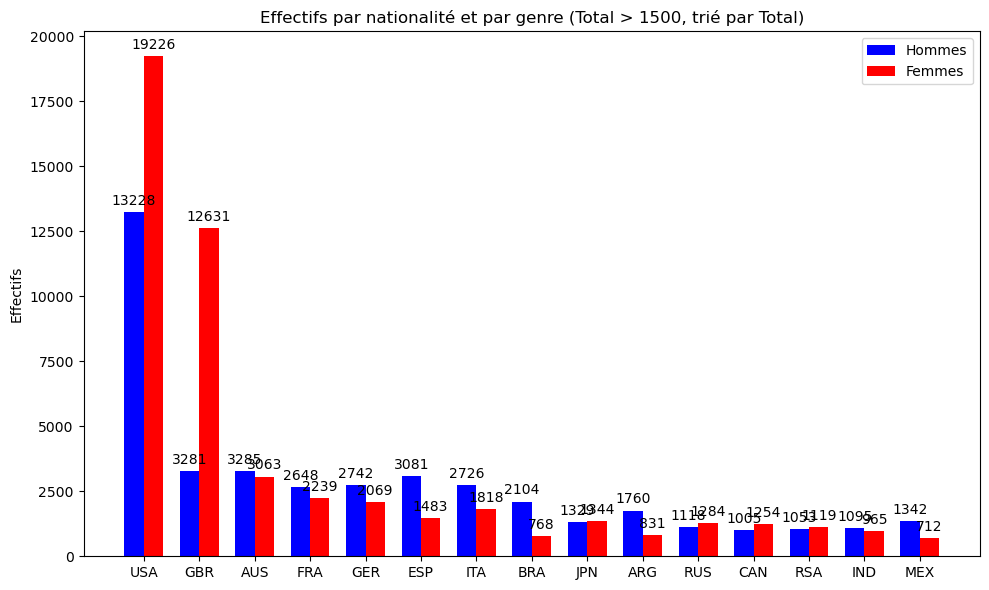

In [32]:

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(effectifs.shape[0])  # Emplacements des étiquettes
largeur = 0.35
rects1 = ax.bar(x - largeur/2, effectifs['effectifs_hommes'], largeur, label='Hommes', color='blue')
rects2 = ax.bar(x + largeur/2, effectifs['effectifs_femmes'], largeur, label='Femmes', color='red')

ax.set_ylabel('Effectifs')
ax.set_title('Effectifs par nationalité et par genre (Total > 1500, trié par Total)')
ax.set_xticks(x)
ax.set_xticklabels(effectifs['nationalite'])
ax.legend()

def autolabel(rects):
    for rect in rects:
        hauteur = rect.get_height()
        ax.annotate('{}'.format(hauteur),
                    xy=(rect.get_x() + rect.get_width() / 2, hauteur),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()